In [ ]:
from graphxai.datasets import ShapeGGen
import matplotlib.pyplot as plt

100%|██████████| 45/45 [00:00<00:00, 136.47it/s]


Jumlah node: 126
Jumlah edge: 362
Jumlah kelas: 2


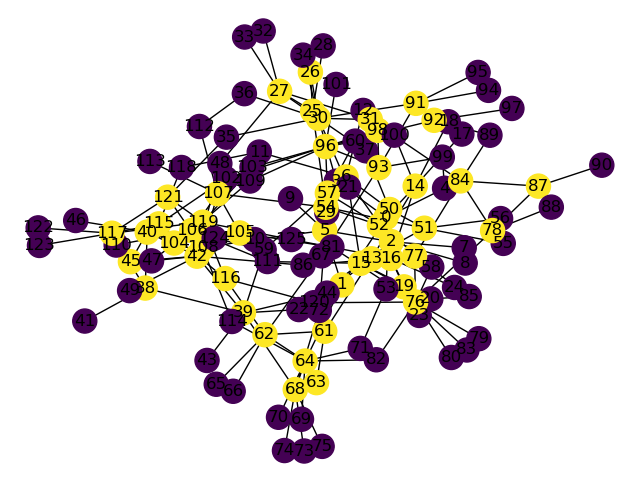

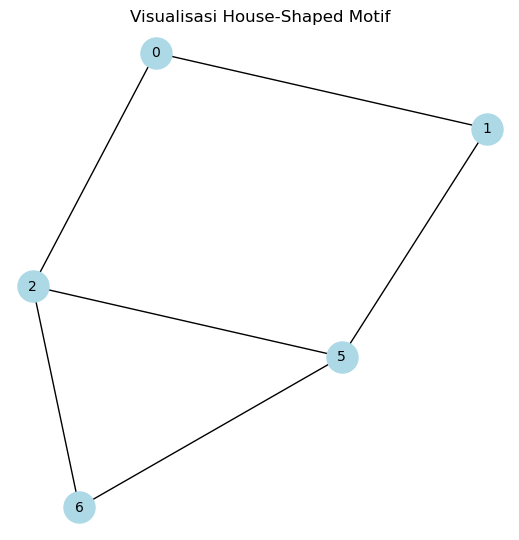

House-shaped motif ditemukan dengan node: [0, 2, 5, 1, 6]


In [11]:
# Membuat dataset dengan motif house-shaped - SG-Base
dataset = ShapeGGen(S='house', Ns=1200, p=0.006, ns=11, K=2, 
                    nf=11, ni=4, sf=0.6, cf=2, φ=0.5, η=1, L=3)

# Menampilkan informasi dataset
print(f"Jumlah node: {dataset.graph.x.shape[0]}")
print(f"Jumlah edge: {dataset.graph.edge_index.shape[1]}")
print(f"Jumlah kelas: {dataset.graph.y.max().item() + 1}")

# Visualisasi dataset
fig, ax = plt.subplots(figsize=(8, 6))
dataset.visualize(shape_label=True, ax=ax, show=True)

import networkx as nx
from networkx.algorithms.isomorphism import GraphMatcher

# Definisi house-shaped motif
house_motif = nx.Graph()
house_motif.add_edges_from([(0,1), (1,2), (2,3), (3,0), (1,4), (2,4)]) # Struktur motif rumah

def find_house_motif_fast(G):
    """
    Mencari house-shaped motif dengan Graph Matching untuk meningkatkan kecepatan.
    Args:
        G (networkx.Graph): Graf NetworkX yang akan dianalisis.
    Returns:
        int: Jumlah house-shaped motif yang ditemukan.
    """
    matcher = GraphMatcher(G, house_motif)
    motifs = list(matcher.subgraph_isomorphisms_iter())

    if len(motifs) == 0:
        print("House-shaped motif tidak ditemukan dalam graf.")
        return

    # Ambil satu motif pertama yang ditemukan
    selected_motif_nodes = list(motifs[0].keys())
    subG = G.subgraph(selected_motif_nodes)

    # Visualisasi motif di dalam graf
    plt.figure(figsize=(5, 5))
    pos = nx.spring_layout(subG, seed=42)  # Posisi node untuk visualisasi
    nx.draw(subG, pos, with_labels=True, node_color='lightblue', edge_color='black', node_size=500, font_size=10)
    plt.title("Visualisasi House-Shaped Motif")
    plt.show()

    print(f"House-shaped motif ditemukan dengan node: {selected_motif_nodes}")

# Konversi ShapeGGen ke NetworkX
G_nx = nx.Graph()
edge_list = dataset.graph.edge_index.numpy().T  # Konversi edge_index dari tensor ke numpy
G_nx.add_edges_from(edge_list)

# Jalankan pencarian dan visualisasi house motif
find_house_motif_fast(G_nx)

100%|██████████| 45/45 [00:00<00:00, 116.83it/s]


Jumlah node: 120
Jumlah edge: 350
Jumlah kelas: 2


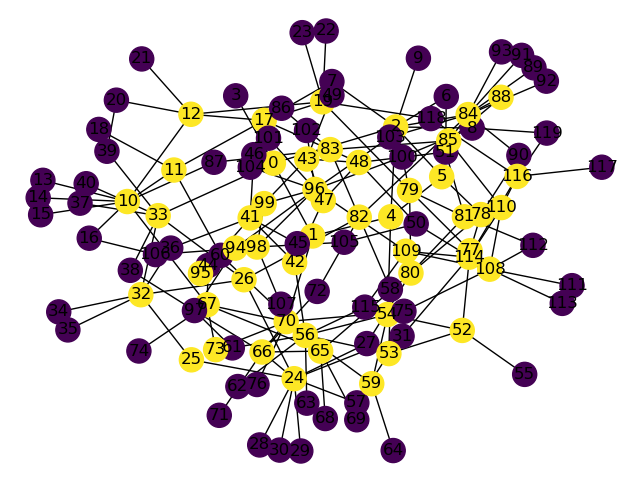

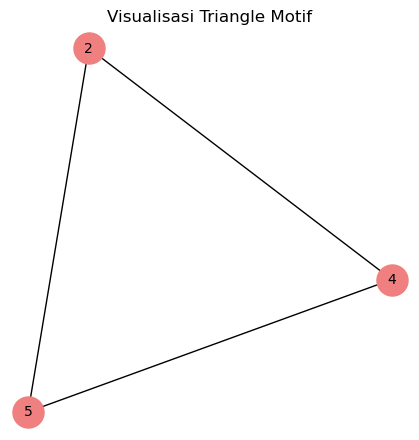

Triangle motif ditemukan dengan node: [2, 4, 5]


[2, 4, 5]

In [13]:
# Membuat dataset dengan motif house-shaped - SG-SmallEx
dataset = ShapeGGen(S='triangle', Ns=1200, p=0.006, ns=12, K=2, 
                    nf=11, ni=4, sf=0.5, cf=2, φ=0.5, η=1, L=3)

# Menampilkan informasi dataset
print(f"Jumlah node: {dataset.graph.x.shape[0]}")
print(f"Jumlah edge: {dataset.graph.edge_index.shape[1]}")
print(f"Jumlah kelas: {dataset.graph.y.max().item() + 1}")

# Visualisasi dataset
fig, ax = plt.subplots(figsize=(8, 6))
dataset.visualize(shape_label=True, ax=ax, show=True)

import networkx as nx
import matplotlib.pyplot as plt

# Fungsi mencari dan menampilkan satu triangle motif
def find_and_visualize_triangle_motif(G):
    """
    Mencari dan memvisualisasikan satu triangle motif dalam graf.
    Args:
        G (networkx.Graph): Graf NetworkX yang akan dianalisis.
    """
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        for i in range(len(neighbors)):
            for j in range(i + 1, len(neighbors)):
                if G.has_edge(neighbors[i], neighbors[j]):
                    # Jika ada hubungan antar dua tetangga, maka terbentuk triangle motif
                    triangle_nodes = [node, neighbors[i], neighbors[j]]
                    subG = G.subgraph(triangle_nodes)

                    # Visualisasi motif triangle
                    plt.figure(figsize=(4, 4))
                    pos = nx.spring_layout(subG, seed=42)  # Posisi node untuk visualisasi
                    nx.draw(subG, pos, with_labels=True, node_color='lightcoral', edge_color='black', node_size=500, font_size=10)
                    plt.title("Visualisasi Triangle Motif")
                    plt.show()

                    print(f"Triangle motif ditemukan dengan node: {triangle_nodes}")
                    return triangle_nodes  # Hanya menampilkan satu triangle motif pertama yang ditemukan

    print("Triangle motif tidak ditemukan dalam graf.")
    return None

# Konversi ShapeGGen ke NetworkX
G_nx = nx.Graph()
edge_list = dataset.graph.edge_index.numpy().T  # Konversi edge_index dari tensor ke numpy
G_nx.add_edges_from(edge_list)

# Jalankan pencarian dan visualisasi triangle motif
find_and_visualize_triangle_motif(G_nx)

100%|██████████| 45/45 [00:00<00:00, 203.12it/s]


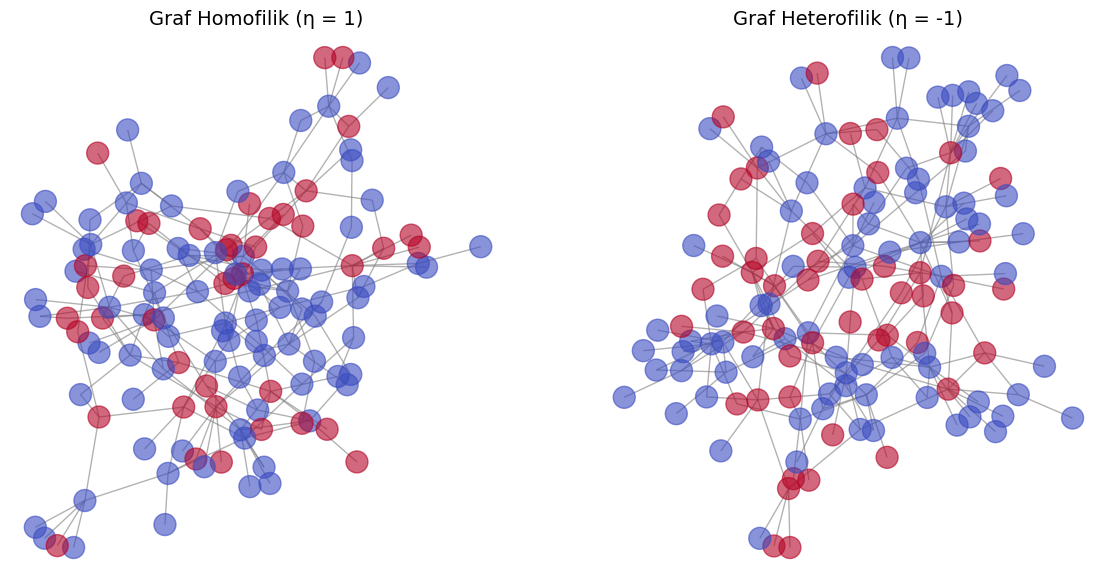


📌 Homophily Ratio untuk Graf Homofilik:
Total Edges: 184
Edges with same label: 104
Edges with different label: 80
Homophily Ratio: 0.565

📌 Homophily Ratio untuk Graf Heterofilik:
Total Edges: 188
Edges with same label: 90
Edges with different label: 98
Homophily Ratio: 0.479


In [69]:
import matplotlib.pyplot as plt
import networkx as nx
import torch
from graphxai.datasets import ShapeGGen

# Fungsi untuk visualisasi dengan warna node berdasarkan labelnya
def visualize_graph(dataset, title, ax):
    """Visualisasi graf dengan warna node berdasarkan labelnya"""
    G = nx.Graph()
    edge_list = dataset.graph.edge_index.numpy().T  # Konversi edge ke numpy
    G.add_edges_from(edge_list)

    # Ambil label node
    labels = dataset.graph.y.tolist()
    # Buat warna berdasarkan label (menggunakan colormap coolwarm)
    color_map = plt.get_cmap('coolwarm')  # Alternatif: 'viridis', 'plasma', 'coolwarm'
    unique_labels = sorted(set(labels))
    node_colors = [color_map(label / max(unique_labels)) for label in labels]

    # Posisi tetap agar hasil visualisasi konsisten
    pos = nx.spring_layout(G, seed=42)  

    # Visualisasi graf dengan warna kontras
    nx.draw(G, pos, node_color=node_colors, with_labels=False, 
            node_size=250, edge_color='gray', alpha=0.6, ax=ax)
    
    ax.set_title(title, fontsize=14)

def compute_homophily_ratio(dataset):
    """Menghitung homophily ratio dengan menampilkan jumlah edge antara label yang sama dan berbeda."""
    
    G = nx.Graph()
    edge_list = dataset.graph.edge_index.numpy().T  # Konversi edge_index ke numpy
    G.add_edges_from(edge_list)

    labels = dataset.graph.y.numpy()  # Label node
    same_label_edges = 0  # Jumlah edge dengan label yang sama
    diff_label_edges = 0  # Jumlah edge dengan label berbeda
    total_edges = G.number_of_edges()

    for u, v in G.edges():
        if labels[u] == labels[v]:  # Jika kedua node memiliki label yang sama
            same_label_edges += 1
        else:
            diff_label_edges += 1

    homophily_ratio = same_label_edges / total_edges  # Rasio homofilik

    print(f"Total Edges: {total_edges}")
    print(f"Edges with same label: {same_label_edges}")
    print(f"Edges with different label: {diff_label_edges}")
    print(f"Homophily Ratio: {homophily_ratio:.3f}")

    return homophily_ratio


# Set seed untuk hasil yang lebih konsisten
torch.manual_seed(42)

# Dataset Homofilik (η = 1)
dataset_homo = ShapeGGen(S='house', Ns=1200, p=0.008, ns=11, 
                        K=2, nf=11, ni=4, sf=0.8, cf=4, φ=0.5, η=1, L=3)

# Dataset Heterofilik (η = -1)
dataset_hetero = ShapeGGen(S='house', Ns=1200, p=0.008, ns=11, 
                        K=2, nf=11, ni=4, sf=0.8, cf=4, φ=0.5, η=-1, L=3)

# Buat subplot untuk membandingkan kedua graf
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Visualisasi Graf
visualize_graph(dataset_homo, "Graf Homofilik (η = 1)", axes[0])
visualize_graph(dataset_hetero, "Graf Heterofilik (η = -1)", axes[1])

# Tampilkan hasil
plt.show()

# Hitung rasio homofilik
print("\n📌 Homophily Ratio untuk Graf Homofilik:")
homophily_homo = compute_homophily_ratio(dataset_homo)

print("\n📌 Homophily Ratio untuk Graf Heterofilik:")
homophily_hetero = compute_homophily_ratio(dataset_hetero)

100%|██████████| 45/45 [00:00<00:00, 281.86it/s]


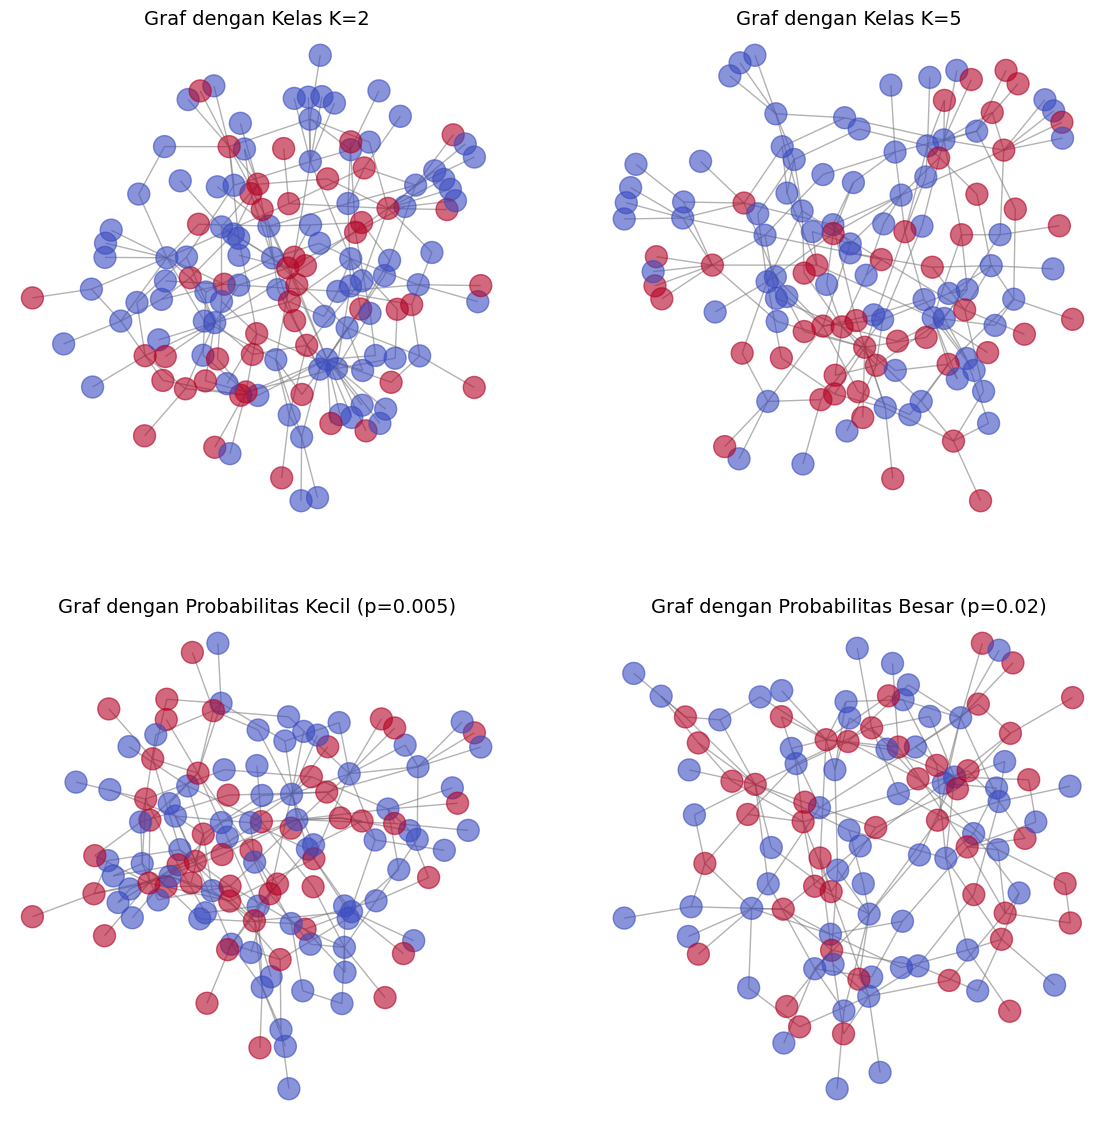


📌 Analisis untuk Dataset dengan K=2:
Total Edges: 192
Edges with same label: 104
Edges with different label: 88
Homophily Ratio: 0.542
Density: 0.021

📌 Analisis untuk Dataset dengan K=5:
Total Edges: 175
Edges with same label: 90
Edges with different label: 85
Homophily Ratio: 0.514
Density: 0.025

📌 Analisis untuk Dataset dengan p=0.005:
Total Edges: 175
Edges with same label: 88
Edges with different label: 87
Homophily Ratio: 0.503
Density: 0.025

📌 Analisis untuk Dataset dengan p=0.02:
Total Edges: 162
Edges with same label: 91
Edges with different label: 71
Homophily Ratio: 0.562
Density: 0.029


In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import torch
from graphxai.datasets import ShapeGGen

# Fungsi untuk memvisualisasikan graf berdasarkan label node
def visualize_graph(dataset, title, ax):
    """Visualisasi graf dengan warna berdasarkan label node."""
    G = nx.Graph()
    edge_list = dataset.graph.edge_index.numpy().T  
    G.add_edges_from(edge_list)

    labels = dataset.graph.y.tolist()
    color_map = plt.get_cmap('coolwarm')  # Menggunakan skala warna kontras
    unique_labels = sorted(set(labels))
    node_colors = [color_map(label / max(unique_labels)) for label in labels]

    pos = nx.spring_layout(G, seed=42)  # Seed untuk hasil tata letak yang konsisten
    nx.draw(G, pos, node_color=node_colors, with_labels=False, 
            node_size=250, edge_color='gray', alpha=0.6, ax=ax)
    ax.set_title(title, fontsize=14)

# Fungsi untuk menghitung Homophily Ratio dan kepadatan graf
def compute_graph_metrics(dataset):
    """Menghitung Homophily Ratio dan kepadatan graf"""
    G = nx.Graph()
    edge_list = dataset.graph.edge_index.numpy().T  
    G.add_edges_from(edge_list)

    labels = dataset.graph.y.numpy()
    same_label_edges, diff_label_edges = 0, 0
    total_edges = G.number_of_edges()

    for u, v in G.edges():
        if labels[u] == labels[v]:  
            same_label_edges += 1
        else:
            diff_label_edges += 1

    homophily_ratio = same_label_edges / total_edges if total_edges > 0 else 0
    density = nx.density(G)  # Menghitung kepadatan graf

    print(f"Total Edges: {total_edges}")
    print(f"Edges with same label: {same_label_edges}")
    print(f"Edges with different label: {diff_label_edges}")
    print(f"Homophily Ratio: {homophily_ratio:.3f}")
    print(f"Density: {density:.3f}")

    return homophily_ratio, density

# Set seed agar hasil konsisten
torch.manual_seed(42)

# Dataset dengan jumlah kelas kecil (K = 2) dan besar (K = 5)
dataset_k2 = ShapeGGen(S='house', Ns=1200, p=0.01, ns=11, 
                        K=2, nf=11, ni=4, sf=0.8, cf=4, φ=0.5, η=1, L=3)

dataset_k5 = ShapeGGen(S='house', Ns=1200, p=0.01, ns=11, 
                        K=5, nf=11, ni=4, sf=0.8, cf=4, φ=0.5, η=1, L=3)
    

# Dataset dengan probabilitas koneksi rendah (p = 0.005) dan tinggi (p = 0.02)
dataset_p_low = ShapeGGen(S='house', Ns=1200, p=0.005, ns=11, 
                        K=2, nf=11, ni=4, sf=0.8, cf=4, φ=0.5, η=1, L=3)

dataset_p_high = ShapeGGen(S='house', Ns=1200, p=0.02, ns=11, 
                        K=2, nf=11, ni=4, sf=0.8, cf=4, φ=0.5, η=1, L=3)

# Membuat subplot untuk membandingkan struktur graf
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# Visualisasi berdasarkan jumlah kelas
visualize_graph(dataset_k2, "Graf dengan Kelas K=2", axes[0, 0])
visualize_graph(dataset_k5, "Graf dengan Kelas K=5", axes[0, 1])

# Visualisasi berdasarkan probabilitas koneksi
visualize_graph(dataset_p_low, "Graf dengan Probabilitas Kecil (p=0.005)", axes[1, 0])
visualize_graph(dataset_p_high, "Graf dengan Probabilitas Besar (p=0.02)", axes[1, 1])

plt.show()

# Menghitung metrik untuk masing-masing graf
print("\n📌 Analisis untuk Dataset dengan K=2:")
homophily_k2, density_k2 = compute_graph_metrics(dataset_k2)

print("\n📌 Analisis untuk Dataset dengan K=5:")
homophily_k5, density_k5 = compute_graph_metrics(dataset_k5)

print("\n📌 Analisis untuk Dataset dengan p=0.005:")
homophily_p_low, density_p_low = compute_graph_metrics(dataset_p_low)

print("\n📌 Analisis untuk Dataset dengan p=0.02:")
homophily_p_high, density_p_high = compute_graph_metrics(dataset_p_high)


In [2]:
import numpy as np

def check_label_distribution(dataset, title):
    labels = dataset.graph.y.numpy()
    unique, counts = np.unique(labels, return_counts=True)

    print(f"\n📊 Distribusi Label untuk {title}:")
    for lbl, count in zip(unique, counts):
        print(f"Label {lbl}: {count} node")

# Cek distribusi kelas dalam dataset K=2 dan K=5
check_label_distribution(dataset_k2, "Graf dengan Kelas K=2")
check_label_distribution(dataset_k5, "Graf dengan Kelas K=5")



📊 Distribusi Label untuk Graf dengan Kelas K=2:
Label 0: 87 node
Label 1: 46 node

📊 Distribusi Label untuk Graf dengan Kelas K=5:
Label 0: 92 node
Label 1: 45 node
